# VERİ SETİNİ İMPORT EDİYORUZ



In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-detect/no/34 no.jpg
/kaggle/input/brain-tumor-detect/no/N20.JPG
/kaggle/input/brain-tumor-detect/no/N1.JPG
/kaggle/input/brain-tumor-detect/no/49 no.jpg
/kaggle/input/brain-tumor-detect/no/N15.jpg
/kaggle/input/brain-tumor-detect/no/No18.jpg
/kaggle/input/brain-tumor-detect/no/31 no.jpg
/kaggle/input/brain-tumor-detect/no/no 6.jpg
/kaggle/input/brain-tumor-detect/no/3 no.jpg
/kaggle/input/brain-tumor-detect/no/no 5.jpeg
/kaggle/input/brain-tumor-detect/no/no 1.jpg
/kaggle/input/brain-tumor-detect/no/26 no.jpg
/kaggle/input/brain-tumor-detect/no/N26.JPG
/kaggle/input/brain-tumor-detect/no/N5.jpg
/kaggle/input/brain-tumor-detect/no/6 no.jpg
/kaggle/input/brain-tumor-detect/no/No21.jpg
/kaggle/input/brain-tumor-detect/no/17 no.jpg
/kaggle/input/brain-tumor-detect/no/No22.jpg
/kaggle/input/brain-tumor-detect/no/29 no.jpg
/kaggle/input/brain-tumor-detect/no/46 no.jpg
/kaggle/input/brain-tumor-detect/no/32 no.jpg
/kaggle/input/brain-tumor-detect/no/42 no.jpg
/kaggle

# **Gerekli Kütüphaneleri İmport Ediyoruz**


In [34]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import random

 # **Resimlerin Yollarını Tanımlıyoruz**

>  **Burada brain_tumor_dataset klasorü altındaki "yes" ve "no" dosyalarının yollarını tanımlıyoruz ki veriyi işleyip, eğitilebilsin**

In [35]:
base_dir = "/kaggle/input/brain-tumor-detect/brain_tumor_dataset/" #Ana Veriseti Klasörü
yes_dir = os.path.join(base_dir, "/kaggle/input/brain-tumor-detect/brain_tumor_dataset/yes")  # Tümörlü görüntüler
no_dir = os.path.join(base_dir, "/kaggle/input/brain-tumor-detect/brain_tumor_dataset/no")    # Tümörsüz görüntüler

# **Yollarını Tanımladığımız Resimlerin Sayılarını Kontrol Ediyoruz**

> **Toplam fotoğraf sayısını, tümörlü ve tümörsüz verilerin sayısını tek tek yazıdırıyoruz ki elimizdeki verisetine hakim olalım.**


In [36]:
num_tumor = len(os.listdir(yes_dir))
num_no_tumor = len(os.listdir(no_dir))
num_base = num_tumor + num_no_tumor

print(f"Number of Tumor images: {num_tumor}")
print(f"Number of No-Tumor images: {num_no_tumor}")
print(f"Number of all images: {num_base}")

Number of Tumor images: 155
Number of No-Tumor images: 98
Number of all images: 253


# **Verilerimiz etikete sahip olduğu için her bir etiket için rastgele 3 örnek görsel yazdırıyoruz**

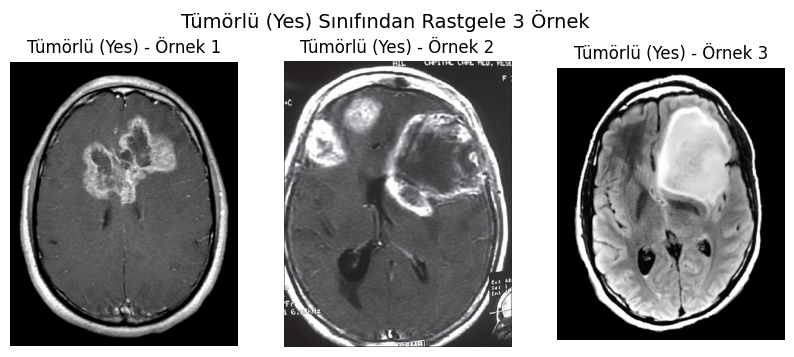

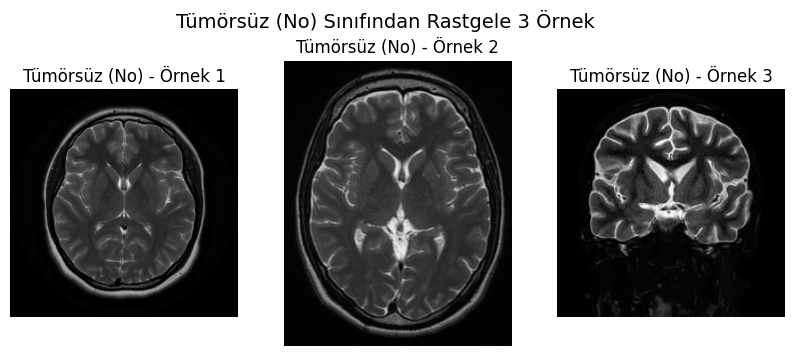

In [37]:
def display_sample_images(directory, class_name, num_samples=3):
    plt.figure(figsize=(10, 4))
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(('jpg', 'jpeg', 'png'))]
    random_samples = random.sample(image_files, min(num_samples, len(image_files)))

    for i, image_path in enumerate(random_samples):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"{class_name} - Örnek {i+1}")
        plt.axis('off')
    plt.suptitle(f"{class_name} Sınıfından Rastgele {num_samples} Örnek", fontsize=14)
    plt.show()


if os.path.exists(yes_dir) and len(os.listdir(yes_dir)) > 0:
    display_sample_images(yes_dir, "Tümörlü (Yes)")
else:
    print(f"'{yes_dir}' klasörü bulunamadı veya boş.")


if os.path.exists(no_dir) and len(os.listdir(no_dir)) > 0:
    display_sample_images(no_dir, "Tümörsüz (No)")
else:
    print(f"'{no_dir}' klasörü bulunamadı veya boş.")



                                # DAHA GÜZEL VERİ GÖRSELLEŞTİRMESİ İÇİN YAPAY ZEKADAN DESTEK ALINMIŞTIR #

>  **Grafik olarak da çıktı alıyoruz ki kafamızda daha da netleşsin verimiz. Bu görselleştirmelerdeki amaç verinin sadece kodda kalmaması ne ile uğraştığımızı da görmek üzerinedir. Bu sayede nerede, hangi adımda kaldığımızı, eksiğimizi bu verileri izleyerek tespit edebiliriz. En azından işimiz daha da kolşaylaşır**.

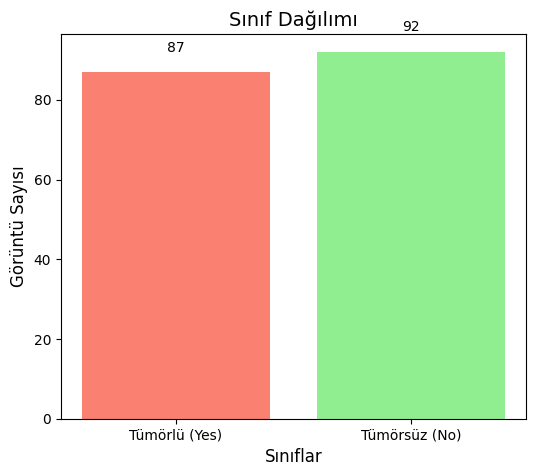

In [38]:
if os.path.exists(yes_dir) and os.path.exists(no_dir):
    num_yes_images = len([f for f in os.listdir(yes_dir) if f.endswith(('jpg', 'jpeg', 'png'))])
    num_no_images = len([f for f in os.listdir(no_dir) if f.endswith(('jpg', 'jpeg', 'png'))])

    class_names = ['Tümörlü (Yes)', 'Tümörsüz (No)']
    image_counts = [num_yes_images, num_no_images]

    plt.figure(figsize=(6, 5))
    bars = plt.bar(class_names, image_counts, color=['salmon', 'lightgreen'])
    plt.title('Sınıf Dağılımı', fontsize=14)
    plt.xlabel('Sınıflar', fontsize=12)
    plt.ylabel('Görüntü Sayısı', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Barların üzerine sayıları ekleyelim
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05 * yval, int(yval), ha='center', va='bottom', fontsize=10)

    plt.show()
else:
    print("Sınıf dağılımını görselleştirmek için 'yes_dir' veya 'no_dir' bulunamadı.")



                                # DAHA GÜZEL VERİ GÖRSELLEŞTİRMESİ İÇİN YAPAY ZEKADAN DESTEK ALINMIŞTIR #

#  Görüntü ve Küme Boyutlandırma ( Veri İşleme )
> 

> **Burada IMG_SIZE olarak 128 seçtik. Genelde bir standart olmakla beraber 2'nin katları tercih edilir. Bilgisayarların işlemesi açısından daha uygun olduğu söylenir. Bu kod ile ilgili olarak amacımız ilerdeki yazacığımız kodlarla beraber verileri tek bir standarda işlemektir. Kısaca bütün veriler 128 piksel yüksekliğinde 128 piksel genişliğindedir.**

> **BATCH_SIZE ise Verileri nasıl işleyeceğini belirtiyor. Yani verilerdeki fotoğrafları alıp bir anda hepsini işlemek yerine 32'lik gruplar halinde işliyor. Bu da bilgisisayarın bellek yönetimi konusunda verimlilik sağlıyor.**

In [39]:
IMG_SIZE = 128  # Genişlik ve yükseklik için genellikle standart 2'nin katı olan 128x128 Değeri seçiliyor.
BATCH_SIZE = 32 # Resimleri 32'lik gruplar halinde işleyeceğini belirtiliyor.

# Eğitim Verisi İçin KERAS ImageDataGenerator Fonksiyonu Kullanımı


In [40]:
# Eğitim verisi için ImageDataGenerator (Veri Artırma ile)
train_datagen = ImageDataGenerator(
    rescale=1./255,            #Piksel değerlerini 0 ile 1 arasında yerleştirir. ( normalizasyon )
    rotation_range=40,         
    width_shift_range=0.2,     
    height_shift_range=0.2, 
    shear_range=0.2,           
    zoom_range=0.2,            
    horizontal_flip=True,      
    fill_mode='nearest',       
    validation_split=0.2       # Verinin ne kadarlık kısmının doğrulama için ayrılacağını belirler. Burada %20'dir. Kalan %80 ise eğitim için kullanılacak demektir.
)



> **Normalde her bir resimin her bir pikseli 0-256  aralığındadır. Modelin daha kolay ve daha iyi öğrenmesi açısında biz bunu 0 - 1 aralığına çekiyoruz. Kalan kısımlar ise veri artırma (data augmentation) adımlarıdır. Buradaki amaç ise az veriyi farklı şekilde göstererek overfitting'in önüne geçmektir. En sonda verilen kısım ise doğrulamaya ayrılacak yüzdedir.**


# Doğrulama/Test verisi için ImageDataGenerator

In [41]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)
    #Burada amaç sadece rescale yapmaktır. Çünkü model değerlendirmesini ham ( sadece boyutlandırılmış ve normalize edilmiş ) veri üzerinde yapmak istiyoruz.

> ***Bu kodla, modelimizin performansını ölçmek için kullanacağımız doğrulama (validation) resimlerini hazırlıyoruz. Eğitim resimlerinden farklı olarak, burada resimlere çok fazla "makyaj" yapmıyoruz.***

In [42]:
train_generator = train_datagen.flow_from_directory(
    base_dir,                  # Ana veri klasörü
    target_size=(IMG_SIZE, IMG_SIZE), # Tüm resimleri başta tanımladığımız boyuta getirir
    batch_size=BATCH_SIZE,
    class_mode='binary',       # iki adet sınıfımız olduğu için ( Tümör var 1 veya yok 0 ) binary kullandık 
    subset='training',         # Bu generator'ın eğitim seti için kullanacağımızı belirtir
    seed=42                    
)

Found 203 images belonging to 2 classes.


**Bu kodla, daha önce ayarlarını yaptığımız train_datagen'ı kullanarak modelimize eğitim resimlerini nasıl ve nereden alacağını söylüyoruz. Kısaca bir üreteç gibi çalıştığını söyleyebiliriz.**
> * Örneğin target_size komutu ile daha önce belirlediğimiz boyutta görsel oluştururuz batch_size ile yine daha önce belirttiğimiz gibi kaçarlı gruplar halinde işleyeceğini belirtiriz. 
> * class_mod'un binary olması ise bizim sınıflamamızdan ötürüdür. Tümör yok veya var gibisinden.
> * subset kısmında ise daha önce de belirttiğimiz %20 validation %80 eğitim olan kısımdan %80 olan eğitimlik kısmı kullanacağımızı belirtir.

In [43]:
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',       # Bu generator'ın doğrulama seti için kullanacağını belirtir
    seed=42                   
)
# Generator'ların bulduğu resim ve sınıf sayılarını kontrol edelim
print(f"Eğitim için bulunan resim sayısı: {train_generator.samples}")
print(f"Doğrulama için bulunan resim sayısı: {validation_generator.samples}")
print(f"Sınıf etiketleri (kodlaması): {train_generator.class_indices}")


Found 50 images belonging to 2 classes.
Eğitim için bulunan resim sayısı: 203
Doğrulama için bulunan resim sayısı: 50
Sınıf etiketleri (kodlaması): {'no': 0, 'yes': 1}


> **Bu kod, train_generator'a çok benziyor ama bu sefer modelimizin performansını ölçmek için kullanacağımız doğrulama (validation) resimlerini hazırlıyor. validation_datagen'ı (hani o veri artırma yapmayan, sadece temel hazırlık yapanı) kullanarak bu üreteci oluşturuyoruz.**
> > **Farklı olarak sadece subset kısmı vardır ki bu da asıl ayrımın olduğu kısımdır zaten. Doğrulama verilerini nereden alacağını ne için kullanacağını belirtir**

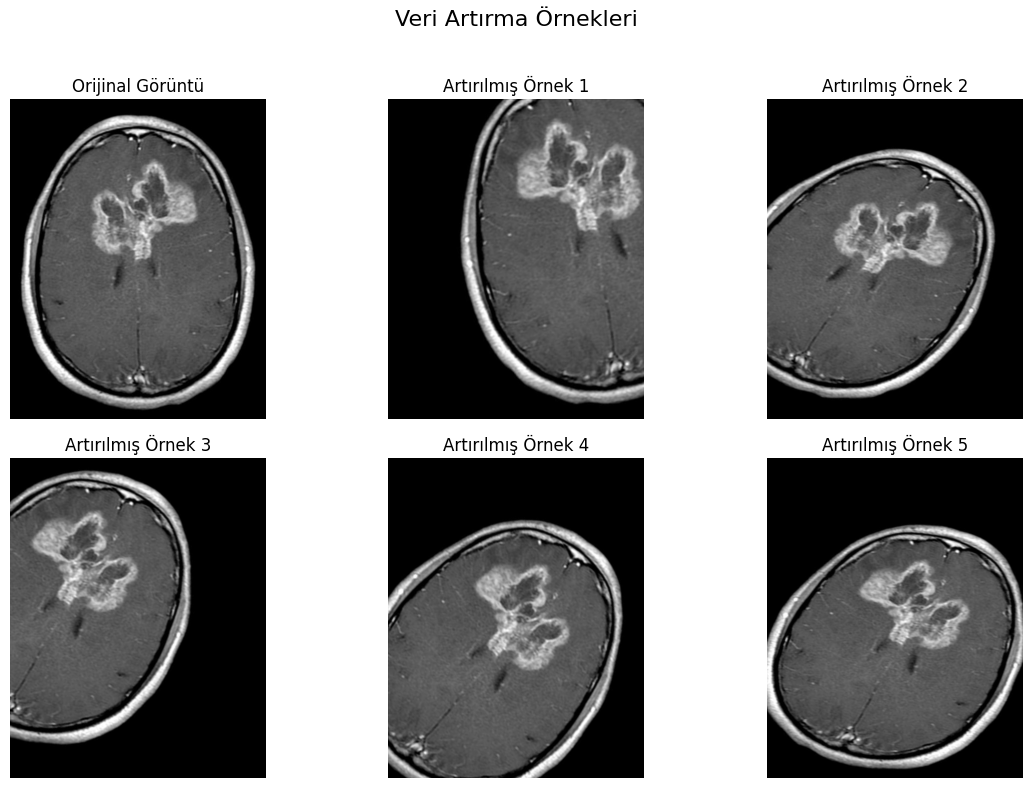

In [44]:
if os.path.exists(yes_dir) and len(os.listdir(yes_dir)) > 0:
    sample_image_files = [os.path.join(yes_dir, f) for f in os.listdir(yes_dir) if f.endswith(('jpg', 'jpeg', 'png'))]
    if sample_image_files:
        sample_image_path = random.choice(sample_image_files)

        img = cv2.imread(sample_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img_for_augmentation = np.expand_dims(img, axis=0) 

        plt.figure(figsize=(12, 8))
        plt.subplot(2, 3, 1)
        plt.imshow(img_rgb)
        plt.title('Orijinal Görüntü')
        plt.axis('off')

        i = 1
        for batch in train_datagen.flow(img_for_augmentation, batch_size=1, seed=42):
            if i < 6:
                plt.subplot(2, 3, i + 1)
                augmented_img = batch[0]
                if train_datagen.rescale:
                     plt.imshow(augmented_img)
                else:
                     plt.imshow(augmented_img.astype('uint8'))

                plt.title(f'Artırılmış Örnek {i}')
                plt.axis('off')
                i += 1
            else:
                break
        plt.suptitle("Veri Artırma Örnekleri", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    else:
        print(f"'{yes_dir}' klasöründe gösterilecek resim bulunamadı.")
else:
    print(f"Veri artırmayı göstermek için '{yes_dir}' klasörü bulunamadı veya boş.")


                                # DAHA GÜZEL VERİ GÖRSELLEŞTİRMESİ İÇİN YAPAY ZEKADAN DESTEK ALINMIŞTIR #

> **Yaptığımız Veri Arttırma sonucu oluşan rastgele 5 görüntü ve orjinal görüntü veriliyor**

# Sinir Ağı (CNN) Modelinin Oluşturulması

> **Gerekli kütüphaneler İmport ediliyor.**

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


> **Bu bölümde, beyin MR'ı resimlerini inceleyip "tümör var mı, yok mu?" diye karar verecek olan yapay zeka modelimizi, yani Evrişimli Sinir Ağı'nı (CNN) kuruyoruz.**
> > Resimler modele ilk ulaştığında özellik çıkarımı için bazı temel katmanlar kullanır bunlar Conv2D'nin katmanlarıdır. Conv2D temelde Resimdeki küçük desenleri (kenarlar, köşeler gibi) bulmaya yarayan filtre kullanır.  Bu filtreler genelde de her katmanda artıl gösterir. Burada sırasıyla 64 128 ve 256'dır. Filtreler soncu bulunan desenlerin en belirgin olanlarını seçerek resmin boyutunu küçültür (2x2'lik alanda en büyüğü alır). Bu, hem hesaplamayı azaltır hem de önemli bilgiyi korur.
   

> **Flatten adımında ise şimdiye kadar çıkardığımız özellikleri bir vektör haline getirir ki diğer katmanlarda işlenebilsin**

> **Düzleştirdiğimiz vektörler için artık karar aşamasıdır**
> >Dense ile klasik bir sinir ağı katmanı oluştururuz. Oluşturduğumuz 256 tane sinir yani "nöron" ile artık anlamlı kararlar vermeye başlayabiliriz. Dropout ise aşırı öğrenmenin önüne geçmke için bir yöntemdir. "Nöronların" belli bir kısmını bir süreliğine devre dışı bırakıp ezberlemenin önüne geçer farklı durumları da öğrendiği için.

> ***Son çıkış katmanında ise sasdece bir "nöron" var çünkü artık karar verme aşamasının sonuna geldik. Artık aldığımız görsel ya tümörlü ya da tümörsüzdür.***

In [46]:
model = Sequential([
    
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)), # 32 filtre, 3x3 kernel boyutu
    MaxPooling2D(2, 2), # 2x2 havuzlama

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(256, activation='relu'), # 128 nöronlu bir Dense katmanı
    Dropout(0.5), # Overfitting'i azaltmak için %50 Dropout

    # Çıkış Katmanı
    Dense(1, activation='sigmoid') 
])

# Modeli Derleme
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Öğrenme oranını düşürdük
              loss='binary_crossentropy', #Modelin tahminlerinin gerçek değerlerden ne kadar saptığını ölçen fonksiyon.
              metrics=['accuracy'])

# Modelin Özetini Yazdırma
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,216,385 (50.42 MB)

 Trainable params: 13,216,385 (50.42 MB)

 Non-trainable params: 0 (0.00 B)

# MODELİN EĞİTİLMESİ


> **Bu kısımda, daha önce kurduğumuz CNN modelini artık "öğrenmeye" başlatıyoruz. Ona resimleri gösterip, hangisinin tümörlü hangisinin tümörsüz olduğunu ayırt etmesini öğreteceğiz**

In [47]:
import math # Sayıları yukarı yuvarlamak için
from tensorflow.keras.callbacks import ReduceLROnPlateau # Akıllı öğrenme hızı için

> **Modelin kaç tur (epoch) eğitileceğidir. İsteğe ve performansa göre değişebilir.**

In [48]:
EPOCHS = 32

 > **Modelin her bir turda (epoch) kaç adımda tüm eğitim resimlerini göreceğini hesaplıyoruz**.
 > **Basitçe, toplam eğitim resmi sayısını bir seferde verdiğimiz resim sayısına (BATCH_SIZE) bölüp,** 
 > **sonucu yukarı yuvarlıyoruz ki hiçbir resim dışarıda kalmasın.**

In [49]:
steps_per_epoch = math.ceil(train_generator.samples / BATCH_SIZE)
validation_steps = math.ceil(validation_generator.samples / BATCH_SIZE)

print(f"Toplam {EPOCHS} tur eğitim yapılacak.")
print(f"Her turda eğitim için {steps_per_epoch} adım, doğrulama için {validation_steps} adım atılacak.")

Toplam 32 tur eğitim yapılacak.
Her turda eğitim için 7 adım, doğrulama için 2 adım atılacak.


In [50]:
# Öğrenme hızını otomatik ayarlayacak yardımcıyı hazırlayalım
# Eğer modelin performansı 5 tur boyunca iyileşmezse, öğrenme hızını %80 azaltacak.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # Neye göre karar verecek: doğrulama kaybına
    patience=5,         # Sabır: 5 tur iyileşme bekle
    factor=0.2,         # Azaltma oranı: 0.2 katına düşür (yani %80 azalt)
    min_lr=0.0001      # En düşük öğrenme hızı limiti
)

> **Modelin Eğitime Başladığı O An**

In [51]:

print("\nModel eğitimi başlıyor...")
history = model.fit(
    train_generator,                # Eğitim verilerini alacağı yer
    epochs=EPOCHS,                  # Kaç tur döneceği
    steps_per_epoch=steps_per_epoch,# Her turda bu kadar eğitim adımı
    validation_data=validation_generator, # Doğrulama verilerini alacağı yer
    validation_steps=validation_steps,    # Her turda bu kadar doğrulama adımı
    callbacks=[reduce_lr]           # Akıllı yardımcımız da devrede olacak
)

print("\nModel eğitimi tamamlandı!")


Model eğitimi başlıyor...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 756ms/step - accuracy: 0.5660 - loss: 0.6627 - val_accuracy: 0.6200 - val_loss: 0.6527 - learning_rate: 1.0000e-04
Epoch 2/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.6371 - loss: 0.6015 - val_accuracy: 0.7600 - val_loss: 0.5528 - learning_rate: 1.0000e-04
Epoch 3/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 479ms/step - accuracy: 0.6237 - loss: 0.6487 - val_accuracy: 0.7200 - val_loss: 0.5405 - learning_rate: 1.0000e-04
Epoch 4/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 0.6134 - loss: 0.6506 - val_accuracy: 0.7800 - val_loss: 0.5206 - learning_rate: 1.0000e-04
Epoch 5/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 392ms/step - accuracy: 0.7387 - loss: 0.5912 - val_accuracy: 0.8000 - val_loss: 0.4951 - learning_rate: 1.0000e-04
Epoch 6/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 396ms/step - accuracy: 0.7332 - loss: 0.6017 - val_accuracy: 0.7800 - val_loss: 0.5260 - learning_rate: 1.0000e-04
Epoch 7/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.7047 - loss:

> **Sonuçları görmek, sonuçlar üzerinden çıkarım ve yorum yapmak için ise veriyi tekrardan görselleştiriyoruz**

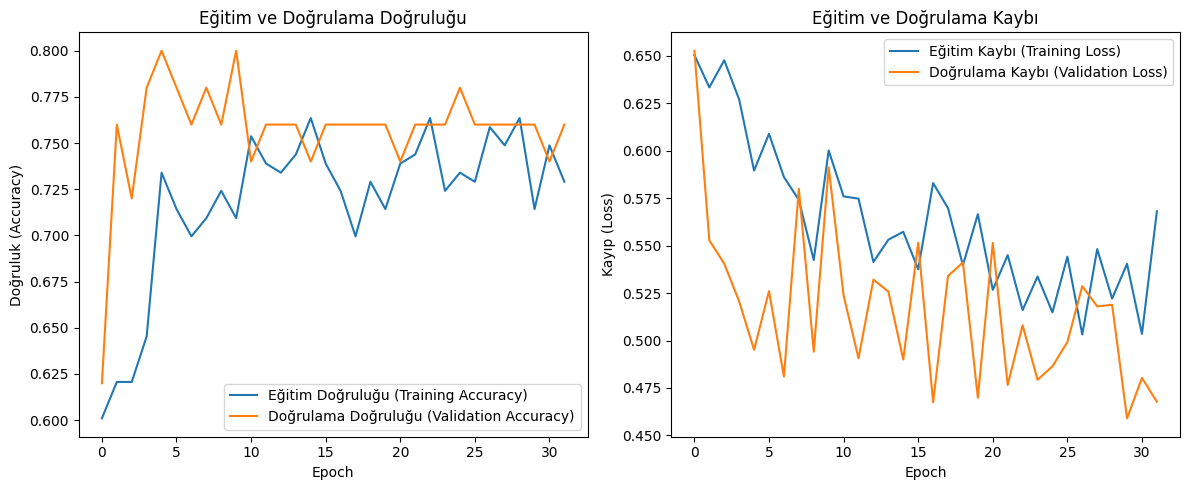

In [52]:
# Eğitim ve Doğrulama Doğruluğunu Çizdirme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 satır, 2 sütun, 1. grafik
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu (Training Accuracy)')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu (Validation Accuracy)')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk (Accuracy)')
plt.legend()

# Eğitim ve Doğrulama Kaybını Çizdirme
plt.subplot(1, 2, 2) # 1 satır, 2 sütun, 2. grafik
plt.plot(history.history['loss'], label='Eğitim Kaybı (Training Loss)')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı (Validation Loss)')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()

plt.tight_layout() 
plt.show()

                                # DAHA GÜZEL VERİ GÖRSELLEŞTİRMESİ İÇİN YAPAY ZEKADAN DESTEK ALINMIŞTIR #

# Modelin Daha Detaylı Değerlendirilmesi

> **Daha önemli ve net olan ( f1 skoru, accuracy vb.) bilgilerin matris eşliğinde veriyoruz ve yine performansı yorumluyoruz.**

Modelin doğrulama verileri üzerindeki notuna bakıyoruz...

Doğrulama Seti Kaybı (Loss): 0.4677
Doğrulama Seti Doğruluğu (Accuracy): 0.7600

Modelin doğrulama resimleri için tahminleri ve gerçek etiketleri toplanıyor...

Toplanan ve kırpılan tahmin sayısı: 50
Toplanan ve kırpılan gerçek etiket sayısı: 50

Karışıklık Matrisi:


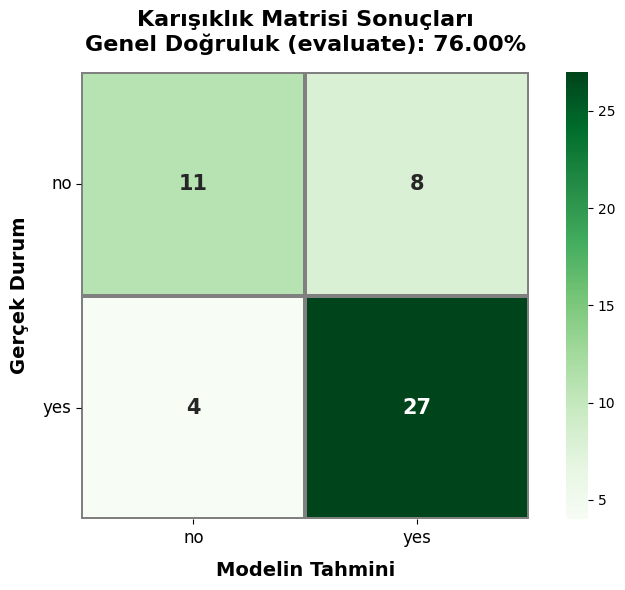


Sınıflandırma Raporu:
              precision    recall  f1-score   support

          no       0.73      0.58      0.65        19
         yes       0.77      0.87      0.82        31

    accuracy                           0.76        50
   macro avg       0.75      0.72      0.73        50
weighted avg       0.76      0.76      0.75        50



In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix, classification_report


print("Modelin doğrulama verileri üzerindeki notuna bakıyoruz...")


loss, accuracy = model.evaluate(validation_generator, steps=validation_steps, verbose=0)
print(f"\nDoğrulama Seti Kaybı (Loss): {loss:.4f}")
print(f"Doğrulama Seti Doğruluğu (Accuracy): {accuracy:.4f}")



print("\nModelin doğrulama resimleri için tahminleri ve gerçek etiketleri toplanıyor...")
validation_generator.reset() 

y_pred_list = []
y_true_list = []

for _ in range(validation_steps):
    X_batch, y_batch_true = next(validation_generator) 
    preds_batch_probs = model.predict_on_batch(X_batch)
    y_true_list.extend(y_batch_true)
    y_pred_list.extend(preds_batch_probs)

gercek_siniflar_toplanmis = np.array(y_true_list)[:validation_generator.samples]
tahmin_olasiklari_toplanmis = np.array(y_pred_list)[:validation_generator.samples]
tahmin_siniflari_toplanmis = (tahmin_olasiklari_toplanmis > 0.5).astype(int).flatten()

print(f"\nToplanan ve kırpılan tahmin sayısı: {len(tahmin_siniflari_toplanmis)}")
print(f"Toplanan ve kırpılan gerçek etiket sayısı: {len(gercek_siniflar_toplanmis)}")


print("\nKarışıklık Matrisi:")
cm = confusion_matrix(gercek_siniflar_toplanmis, tahmin_siniflari_toplanmis)

plt.figure(figsize=(8, 6))

idx_to_class = {v: k for k, v in validation_generator.class_indices.items()}
sinif_etiketleri_sirali = [idx_to_class[i] for i in range(len(idx_to_class))]

sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=sinif_etiketleri_sirali,
            yticklabels=sinif_etiketleri_sirali,
            annot_kws={"size": 15, "weight": "bold"},
            linewidths=1.5,
            linecolor='gray',
            cbar=True,
            square=True)

plt.xlabel('Modelin Tahmini', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Gerçek Durum', fontsize=14, fontweight='bold', labelpad=10)
# Başlığa model.evaluate'den gelen doğruluğu ekliyoruz
plt.title(f'Karışıklık Matrisi Sonuçları\nGenel Doğruluk (evaluate): {accuracy:.2%}', fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(rotation=0, va='center', fontsize=12)
plt.tight_layout()
plt.show()


print("\nSınıflandırma Raporu:")
rapor = classification_report(gercek_siniflar_toplanmis, tahmin_siniflari_toplanmis, target_names=sinif_etiketleri_sirali)
print(rapor)


                                # DAHA GÜZEL VERİ GÖRSELLEŞTİRMESİ İÇİN YAPAY ZEKADAN DESTEK ALINMIŞTIR #